In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('social_network.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = pd.get_dummies(df, drop_first = True)

In [5]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [6]:
X = df.loc[:,['Age','EstimatedSalary','Gender_Male']]

In [7]:
Y = df.loc[:,['Purchased']].values

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
x = sc.fit_transform(X)

In [11]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [12]:
y = Y.reshape(-1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_tr,X_ts,Y_tr,Y_ts = train_test_split(X,Y, random_state = 10, test_size = 0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
acc_value =[]
err_value = []

In [17]:
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_tr,Y_tr)
    Y_prediction = model.predict(X_ts)
    accuracy = accuracy_score(Y_ts,Y_prediction)
    acc_value.append(accuracy)
    err_value.append(1-accuracy)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [19]:
import matplotlib.pyplot as plt

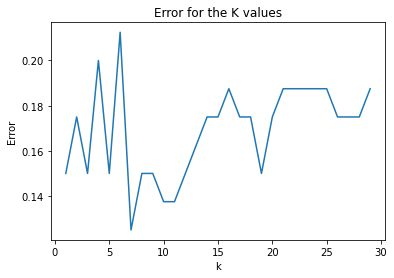

In [20]:
plt.plot(range(1,30),err_value)
plt.title('Error for the K values')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [23]:
model1 = KNeighborsClassifier(n_neighbors = 7)
model1.fit(X_tr,Y_tr)
Y_prediction1 = model1.predict(X_ts)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(Y_ts,Y_prediction1)

array([[48,  4],
       [ 6, 22]], dtype=int64)

In [27]:
accuracy_score(Y_ts,Y_prediction1)

0.875

In [28]:
 import pickle

In [30]:
file = open('knn.pkl','wb')

In [31]:
pickle.dump(model1, file)